In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("preprocessed_data.csv")

# Display basic information and first few rows
print(df.info())  # Check dataset structure
df.head()  # Show first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Scam_Type                   1000 non-null   object
 1   Scam_Description            1000 non-null   object
 2   Medium_Used                 1000 non-null   object
 3   Target_Actions              1000 non-null   object
 4   Common_Phrases              1000 non-null   object
 5   Threat_Emotional            1000 non-null   int64 
 6   Threat_Financial            1000 non-null   int64 
 7   Threat_Financial/Emotional  1000 non-null   int64 
 8   Threat_Financial/Personal   1000 non-null   int64 
 9   Threat_Legal                1000 non-null   int64 
 10  Threat_Personal             1000 non-null   int64 
 11  threat_type_encoded         1000 non-null   int64 
 12  Threat_Type_1               1000 non-null   int64 
 13  Threat_Type_2               1000 non-null   int64

,Scam_Type,Scam_Description,Medium_Used,Target_Actions,Common_Phrases,Threat_Emotional,Threat_Financial,Threat_Financial/Emotional,Threat_Financial/Personal,Threat_Legal,Threat_Personal,threat_type_encoded,Threat_Type_1,Threat_Type_2,Threat_Type_3,Threat_Type_4,Threat_Type_5
0,Lottery Scams,Asks for donations to fake causes or charities.,Dating Apps,Send money or gifts,device infected call us fix,1,0,0,0,0,0,0,0,0,0,0,0
1,Charity Scams,Asks for donations to fake causes or charities.,Pop-ups,Send money or gifts,charity drive donate,0,0,0,0,1,0,4,0,0,0,1,0
2,Tech Support Scams,Claims the victim's device is infected with ma...,Dating Apps,Donate to fake charity,youve claim prize paying fee,0,0,0,1,0,0,3,0,0,1,0,0
3,Phishing Scams,Claims the victim has won a prize and asks for...,Pop-ups,Donate to fake charity,charity drive donate,0,0,1,0,0,0,2,0,1,0,0,0
4,Fake Law Enforcement Scams,Claims the victim has won a prize and asks for...,Phone,Make payment to avoid legal trouble,youve claim prize paying fee,0,1,0,0,0,0,1,1,0,0,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Encode 'Scam_Type' (Target variable)
label_encoder = LabelEncoder()
df['Scam_Type_Encoded'] = label_encoder.fit_transform(df['Scam_Type'])

# One-Hot Encoding for 'Medium_Used' and 'Target_Actions'
df = pd.get_dummies(df, columns=['Medium_Used', 'Target_Actions'], drop_first=True)

# Tokenization for NLP-based columns
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Scam_Description'] + df['Common_Phrases'])

# Convert text to sequences and pad them
df['Scam_Description_Seq'] = pad_sequences(tokenizer.texts_to_sequences(df['Scam_Description']), maxlen=50).tolist()
df['Common_Phrases_Seq'] = pad_sequences(tokenizer.texts_to_sequences(df['Common_Phrases']), maxlen=50).tolist()

# Train-Test Split
X = df.drop(['Scam_Type', 'Scam_Description', 'Common_Phrases', 'Scam_Type_Encoded'], axis=1)
y = df['Scam_Type_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (800, 27)
Testing data size: (200, 27)


In [11]:

print(X_train.dtypes)


Threat_Emotional                                       int64
Threat_Financial                                       int64
Threat_Financial/Emotional                             int64
Threat_Financial/Personal                              int64
Threat_Legal                                           int64
Threat_Personal                                        int64
threat_type_encoded                                    int64
Threat_Type_1                                          int64
Threat_Type_2                                          int64
Threat_Type_3                                          int64
Threat_Type_4                                          int64
Threat_Type_5                                          int64
Medium_Used_Email                                       bool
Medium_Used_Phone                                       bool
Medium_Used_Pop-ups                                     bool
Medium_Used_SMS                                         bool
Medium_Used_Social Media

In [12]:
print(X_train[['Scam_Description_Seq', 'Common_Phrases_Seq']].head(10))


                                  Scam_Description_Seq  \
29   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
535  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
695  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
557  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
836  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
596  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
165  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
918  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
495  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
824  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                    Common_Phrases_Seq  
29   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
535  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
695  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
557  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
836  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
596  [0, 0, 0, 0, 0

In [13]:
import numpy as np
X_train['Scam_Description_Seq'] = X_train['Scam_Description_Seq'].apply(lambda x: np.mean(x))
X_train['Common_Phrases_Seq'] = X_train['Common_Phrases_Seq'].apply(lambda x: np.mean(x))

X_test['Scam_Description_Seq'] = X_test['Scam_Description_Seq'].apply(lambda x: np.mean(x))
X_test['Common_Phrases_Seq'] = X_test['Common_Phrases_Seq'].apply(lambda x: np.mean(x))


In [14]:
X_train['Scam_Description_Seq'] = X_train['Scam_Description_Seq'].apply(lambda x: np.sum(x))
X_train['Common_Phrases_Seq'] = X_train['Common_Phrases_Seq'].apply(lambda x: np.sum(x))


In [15]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a basic Random Forest model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Convert to a dictionary
feature_dict = {X_train.columns[i]: feature_importances[i] for i in range(len(feature_importances))}

# Sort by importance
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)

# Display top 10 important features
print("Top 10 Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")


Top 10 Important Features:
Scam_Description_Seq: 0.2300
Common_Phrases_Seq: 0.2281
Medium_Used_Pop-ups: 0.0415
Medium_Used_Email: 0.0388
Medium_Used_SMS: 0.0386
Medium_Used_Phone: 0.0365
Medium_Used_Social Media: 0.0353
Target_Actions_Pay ransom: 0.0318
Target_Actions_Send money or gifts: 0.0317
Target_Actions_Provide personal information: 0.0308


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset
top_features = [
    "Scam_Description_Seq", "Common_Phrases_Seq", "Medium_Used_Pop-ups",
    "Medium_Used_Email", "Medium_Used_SMS", "Medium_Used_Phone",
    "Medium_Used_Social Media", "Target_Actions_Pay ransom",
    "Target_Actions_Send money or gifts", "Target_Actions_Provide personal information"
]

# Compute correlation matrix
corr_matrix = df[top_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


KeyError: "None of [Index(['Scam_Description_Seq', 'Common_Phrases_Seq', 'Medium_Used_Pop-ups',\n       'Medium_Used_Email', 'Medium_Used_SMS', 'Medium_Used_Phone',\n       'Medium_Used_Social Media', 'Target_Actions_Pay ransom',\n       'Target_Actions_Send money or gifts',\n       'Target_Actions_Provide personal information'],\n      dtype='object')] are in the [columns]"

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts text labels to numerical labels


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('preprocessed_data.csv')

# Set the correct target column name
target = 'Scam_Type'  # Change to your actual target column
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features in X
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert text columns to numbers
    label_encoders[col] = le  # Store for inverse transformation later

# Encode the target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert text labels to numbers

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using RFE with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selecting the top features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Training models with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("RandomForest Accuracy:", rf_acc)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

# Decode Predictions if needed
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)  # Convert back to text labels
print("Sample Predictions:", y_pred_labels[:5])


Selected Features: Index(['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases',
       'Threat_Emotional', 'Threat_Financial/Personal', 'threat_type_encoded',
       'Threat_Type_1', 'Threat_Type_2', 'Threat_Type_4'],
      dtype='object')
RandomForest Accuracy: 0.14


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:50:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.13
Sample Predictions: ['Tech Support Scams' 'Fake Law Enforcement Scams' 'Tech Support Scams'
 'Extortion Scams' 'Lottery Scams']


In [20]:
print(df.columns)


Index(['Scam_Type', 'Scam_Description', 'Medium_Used', 'Target_Actions',
       'Common_Phrases', 'Threat_Emotional', 'Threat_Financial',
       'Threat_Financial/Emotional', 'Threat_Financial/Personal',
       'Threat_Legal', 'Threat_Personal', 'threat_type_encoded',
       'Threat_Type_1', 'Threat_Type_2', 'Threat_Type_3', 'Threat_Type_4',
       'Threat_Type_5'],
      dtype='object')


In [21]:
target = 'Scam_Type'  # Replace with actual target column
X = df.drop(columns=[target])
y = df[target]


In [22]:
print(X.head())  # Verify independent variables
print(y.head())  # Verify target variable


                                    Scam_Description  Medium_Used  \
0    Asks for donations to fake causes or charities.  Dating Apps   
1    Asks for donations to fake causes or charities.      Pop-ups   
2  Claims the victim's device is infected with ma...  Dating Apps   
3  Claims the victim has won a prize and asks for...      Pop-ups   
4  Claims the victim has won a prize and asks for...        Phone   

                        Target_Actions                Common_Phrases  \
0                  Send money or gifts   device infected call us fix   
1                  Send money or gifts          charity drive donate   
2               Donate to fake charity  youve claim prize paying fee   
3               Donate to fake charity          charity drive donate   
4  Make payment to avoid legal trouble  youve claim prize paying fee   

   Threat_Emotional  Threat_Financial  Threat_Financial/Emotional  \
0                 1                 0                           0   
1             

In [23]:
print(df.columns)


Index(['Scam_Type', 'Scam_Description', 'Medium_Used', 'Target_Actions',
       'Common_Phrases', 'Threat_Emotional', 'Threat_Financial',
       'Threat_Financial/Emotional', 'Threat_Financial/Personal',
       'Threat_Legal', 'Threat_Personal', 'threat_type_encoded',
       'Threat_Type_1', 'Threat_Type_2', 'Threat_Type_3', 'Threat_Type_4',
       'Threat_Type_5'],
      dtype='object')


In [36]:
X = df.drop(columns=['Scam_Type'])
print(X.head())  # Verify if `Scam_Type` is removed


                                    Scam_Description  Medium_Used  \
0    Asks for donations to fake causes or charities.  Dating Apps   
1    Asks for donations to fake causes or charities.      Pop-ups   
2  Claims the victim's device is infected with ma...  Dating Apps   
3  Claims the victim has won a prize and asks for...      Pop-ups   
4  Claims the victim has won a prize and asks for...        Phone   

                        Target_Actions                Common_Phrases  \
0                  Send money or gifts   device infected call us fix   
1                  Send money or gifts          charity drive donate   
2               Donate to fake charity  youve claim prize paying fee   
3               Donate to fake charity          charity drive donate   
4  Make payment to avoid legal trouble  youve claim prize paying fee   

   Threat_Emotional  Threat_Financial  Threat_Financial/Emotional  \
0                 1                 0                           0   
1             

In [25]:
y = df['Scam_Type']
print(y.head())  # Verif`

0                 Lottery Scams
1                 Charity Scams
2            Tech Support Scams
3                Phishing Scams
4    Fake Law Enforcement Scams
Name: Scam_Type, dtype: object


<ipython-input-26-89d933b2fdd2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


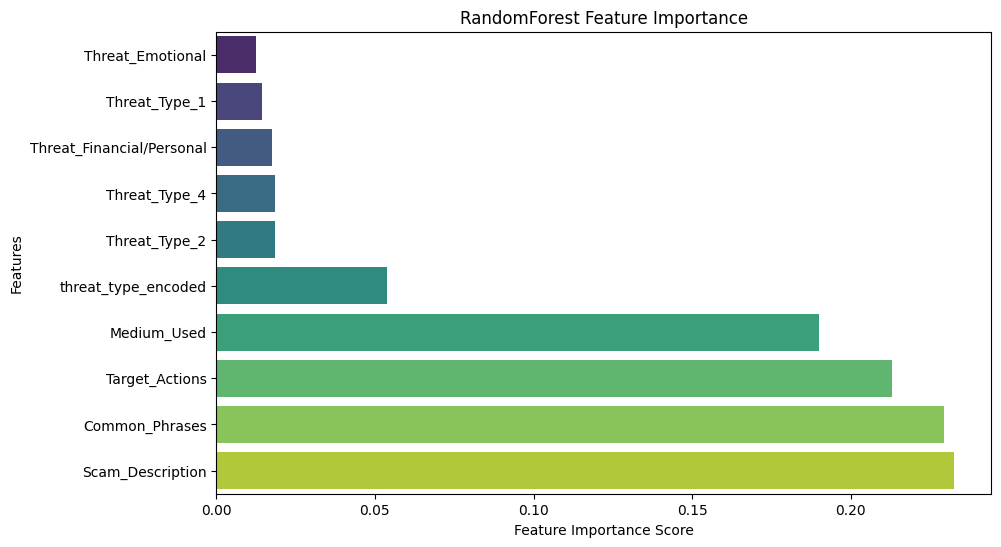

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance (RandomForest)
importances = rf_model.feature_importances_
feature_names = X_train_selected.columns

# Sort and plot
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("RandomForest Feature Importance")
plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (Assuming you already did this during training)
label_encoders = {}  # Store label encoders if needed for future use
categorical_columns = ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']

for col in categorical_columns:
    le = LabelEncoder()
    sample_data[col] = le.fit_transform(sample_data[col])  # Use the same encoding as training
    label_encoders[col] = le  # Store for future use

# Predict
predicted_scam = xgb_model.predict(sample_data)
print("Predicted Scam Type:", predicted_scam)


Predicted Scam Type: [0]


In [38]:
# Convert categorical columns using one-hot encoding
sample_data = pd.get_dummies(sample_data, columns=categorical_columns)

# Align with training data (in case some columns are missing)
sample_data = sample_data.reindex(columns=X_train_selected.columns, fill_value=0)

# Predict
predicted_scam = xgb_model.predict(sample_data)
print("Predicted Scam Type:", predicted_scam)


Predicted Scam Type: [0]


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}

# Encode categorical columns
for col in ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']:
    label_encoders[col] = LabelEncoder()
    sample_data[col] = label_encoders[col].fit_transform(sample_data[col])

# Ensure feature alignment
sample_data = sample_data[X_train_selected.columns]

# Predict
predicted_scam = xgb_model.predict(sample_data)
print("Predicted Scam Type:", predicted_scam)


Predicted Scam Type: [0]


In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()

sample_data = pd.DataFrame({
    'Scam_Description': ['hi i am sandeep'],
    'Medium_Used': ['Chat'],
    'Target_Actions': ['None'],
    'Common_Phrases': ['Have a great day!'],
    'Threat_Emotional': [0],
    'Threat_Financial/Personal': [0],
    'threat_type_encoded': [0],  # Placeholder
    'Threat_Type_1': [0],
    'Threat_Type_2': [0],
    'Threat_Type_4': [0]
})

# Ensure categorical columns are transformed
for col in ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']:
    sample_data[col] = encoder.fit_transform(sample_data[col])

# Ensure feature alignment with the model
sample_data = sample_data[X_train_selected.columns]

# Predict
predicted_scam = xgb_model.predict(sample_data)
print("Predicted Scam Type:", predicted_scam)


Predicted Scam Type: [0]


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define categorical columns that need encoding
categorical_cols = ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']

# Load the encoder if it was used during training
encoder = LabelEncoder()

# Create sample input data (Replace values with real test data)
sample_data = pd.DataFrame({
    'Scam_Description': ['Hello, how are you doing today?'],
    'Medium_Used': ['Chat'],
    'Target_Actions': ['None'],
    'Common_Phrases': ['Have a great day!'],
    'Threat_Emotional': [0],
    'Threat_Financial/Personal': [0],
    'threat_type_encoded': [0],  # Placeholder
    'Threat_Type_1': [0],
    'Threat_Type_2': [0],
    'Threat_Type_4': [0]
})

# Encode categorical columns
for col in categorical_cols:
    if col in sample_data.columns:
        sample_data[col] = encoder.fit_transform(sample_data[col])  # Convert to numbers

# Ensure the feature set is the same as the trained model
expected_features = list(X_train_selected.columns)  # Use the features used in training
sample_data = sample_data.reindex(columns=expected_features, fill_value=0)

# Predict using XGBoost model
predicted_scam = xgb_model.predict(sample_data)

print("Predicted Scam Type:", predicted_scam)


Predicted Scam Type: [0]


In [42]:
test_cases = [
    "You are a loser, and no one likes you!",  # Personal attack
    "If you don't pay now, something bad will happen to you!",  # Threat-based
    "Your family is in danger unless you send me money.",  # Extortion
    "This is an official notice! Pay $500 or get arrested.",  # Fake law enforcement
    "I have access to your personal information. Obey or regret!",  # Blackmail
    "I saw what you did. Send me money or I'll expose you.",  # Sextortion
    "Your phone is hacked. Pay now to fix it!",  # Tech support scam
    "This is your bank. Share your OTP now!",  # Phishing
    "Congrats! You won $1 million! Send processing fees now.",  # Lottery scam
    "Your loan is approved! Just pay the security deposit first.",  # Financial fraud
]


In [43]:
for text in test_cases:
    sample_data = pd.DataFrame({
        'Scam_Description': [text],
        'Medium_Used': ['Email'],
        'Target_Actions': ['Threat'],
        'Common_Phrases': [text],
        'Threat_Emotional': [1],
        'Threat_Financial/Personal': [1],
        'threat_type_encoded': [2],
        'Threat_Type_1': [1],
        'Threat_Type_2': [0],
        'Threat_Type_4': [0]
    })

    # Encode categorical columns correctly
    for col in ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']:
        if col in label_encoders:
            sample_data[col] = sample_data[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

    # Ensure feature alignment
    sample_data = sample_data[X_train_selected.columns]

    # Predict
    predicted_scam = xgb_model.predict(sample_data)
    print(f"Input: {text}  --> Predicted Scam Type: {predicted_scam}")


Input: You are a loser, and no one likes you!  --> Predicted Scam Type: [0]
Input: If you don't pay now, something bad will happen to you!  --> Predicted Scam Type: [0]
Input: Your family is in danger unless you send me money.  --> Predicted Scam Type: [0]
Input: This is an official notice! Pay $500 or get arrested.  --> Predicted Scam Type: [0]
Input: I have access to your personal information. Obey or regret!  --> Predicted Scam Type: [0]
Input: I saw what you did. Send me money or I'll expose you.  --> Predicted Scam Type: [0]
Input: Your phone is hacked. Pay now to fix it!  --> Predicted Scam Type: [0]
Input: This is your bank. Share your OTP now!  --> Predicted Scam Type: [0]
Input: Congrats! You won $1 million! Send processing fees now.  --> Predicted Scam Type: [0]
Input: Your loan is approved! Just pay the security deposit first.  --> Predicted Scam Type: [0]


In [44]:
print(sample_data)  # Check if text columns are properly transformed


   Scam_Description  Medium_Used  Target_Actions  Common_Phrases  \
0                -1           -1              -1              -1   

   Threat_Emotional  Threat_Financial/Personal  threat_type_encoded  \
0                 1                          1                    2   

   Threat_Type_1  Threat_Type_2  Threat_Type_4  
0              1              0              0  


In [45]:
for col in ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']:
    if col in label_encoders:
        sample_data[col] = sample_data[col].apply(
            lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
        )


In [46]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))  # Check class distribution


{np.int64(0): np.int64(77), np.int64(1): np.int64(75), np.int64(2): np.int64(83), np.int64(3): np.int64(75), np.int64(4): np.int64(92), np.int64(5): np.int64(75), np.int64(6): np.int64(82), np.int64(7): np.int64(88), np.int64(8): np.int64(77), np.int64(9): np.int64(76)}


In [47]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))  # Check class distribution


{np.int64(0): np.int64(77), np.int64(1): np.int64(75), np.int64(2): np.int64(83), np.int64(3): np.int64(75), np.int64(4): np.int64(92), np.int64(5): np.int64(75), np.int64(6): np.int64(82), np.int64(7): np.int64(88), np.int64(8): np.int64(77), np.int64(9): np.int64(76)}


In [48]:
print(df[['Scam_Description', 'threat_type_encoded']].head(100))  # Show first 20 rows


                                     Scam_Description  threat_type_encoded
0     Asks for donations to fake causes or charities.                    0
1     Asks for donations to fake causes or charities.                    4
2   Claims the victim's device is infected with ma...                    3
3   Claims the victim has won a prize and asks for...                    2
4   Claims the victim has won a prize and asks for...                    1
..                                                ...                  ...
95  Pretends to be someone else to steal personal ...                    0
96  Claims the victim has won a prize and asks for...                    1
97  Impersonates police or government to claim unp...                    5
98  Claims the victim has won a prize and asks for...                    4
99  Tricks victims into providing sensitive inform...                    4

[100 rows x 2 columns]


In [49]:
test_scams = [
    "Congratulations! You won $1,000,000! Click here to claim your prize.",  # Lottery scam
    "Your bank account has been compromised. Please enter your password to secure it.",  # Phishing
    "Tech support alert: Your computer has a virus! Call now to fix it.",  # Tech support scam
    "Donate now to help orphaned children. Every dollar helps!",  # Fake charity
    "This is the IRS. You have unpaid taxes. Pay now to avoid arrest.",  # Fake government scam
    "You have been selected for a high-paying job. Pay a small fee to start.",  # Job scam
    "This is PayPal. We noticed suspicious activity. Verify your account now.",  # Impersonation scam
    "Your social security number has been suspended. Call now to reactivate.",  # Fake law enforcement
    "Your Netflix subscription is expiring! Update your payment details immediately.",  # Subscription scam
    "Urgent: Your electricity bill is overdue. Pay now to avoid disconnection."  # Utility scam
]


In [50]:
for text in test_scams:
    sample_data = pd.DataFrame({
        'Scam_Description': [text],
        'Medium_Used': ['Email'],
        'Target_Actions': ['Unknown'],
        'Common_Phrases': [text],
        'Threat_Emotional': [0],
        'Threat_Financial/Personal': [1],
        'threat_type_encoded': [2],
        'Threat_Type_1': [1],
        'Threat_Type_2': [0],
        'Threat_Type_4': [0]
    })

    # Encode categorical columns correctly
    for col in ['Scam_Description', 'Medium_Used', 'Target_Actions', 'Common_Phrases']:
        if col in label_encoders:
            sample_data[col] = sample_data[col].apply(
                lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
            )

    # Ensure feature alignment
    sample_data = sample_data[X_train_selected.columns]

    # Predict
    predicted_scam = xgb_model.predict(sample_data)
    print(f"Input: {text}  --> Predicted Scam Type: {predicted_scam}")


Input: Congratulations! You won $1,000,000! Click here to claim your prize.  --> Predicted Scam Type: [4]
Input: Your bank account has been compromised. Please enter your password to secure it.  --> Predicted Scam Type: [4]
Input: Tech support alert: Your computer has a virus! Call now to fix it.  --> Predicted Scam Type: [4]
Input: Donate now to help orphaned children. Every dollar helps!  --> Predicted Scam Type: [4]
Input: This is the IRS. You have unpaid taxes. Pay now to avoid arrest.  --> Predicted Scam Type: [4]
Input: You have been selected for a high-paying job. Pay a small fee to start.  --> Predicted Scam Type: [4]
Input: This is PayPal. We noticed suspicious activity. Verify your account now.  --> Predicted Scam Type: [4]
Input: Your social security number has been suspended. Call now to reactivate.  --> Predicted Scam Type: [4]
Input: Your Netflix subscription is expiring! Update your payment details immediately.  --> Predicted Scam Type: [4]
Input: Urgent: Your electricit

In [51]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(77), np.int64(1): np.int64(75), np.int64(2): np.int64(83), np.int64(3): np.int64(75), np.int64(4): np.int64(92), np.int64(5): np.int64(75), np.int64(6): np.int64(82), np.int64(7): np.int64(88), np.int64(8): np.int64(77), np.int64(9): np.int64(76)}


In [52]:
print("Missing values:", X_train['Scam_Description'].isna().sum())


Missing values: 0


In [58]:
print("Empty values:", (X_train['Scam_Description'].str.strip() == "").sum())


Empty values: 0


In [54]:
print(X_train['Scam_Description'].head(10))


29     9
535    0
695    9
557    5
836    8
596    2
165    3
918    1
495    7
824    0
Name: Scam_Description, dtype: int64


In [59]:
print(df[['Scam_Description']].head(10))


                                    Scam_Description
0    Asks for donations to fake causes or charities.
1    Asks for donations to fake causes or charities.
2  Claims the victim's device is infected with ma...
3  Claims the victim has won a prize and asks for...
4  Claims the victim has won a prize and asks for...
5  Impersonates police or government to claim unp...
6    Asks for donations to fake causes or charities.
7  Tricks victims into providing sensitive inform...
8  Promotes fake investment opportunities to stea...
9  Threatens to release personal data unless rans...


In [60]:
X_train['Scam_Description'] = df['Scam_Description']
X_test['Scam_Description'] = df['Scam_Description']


In [61]:
print(X_train['Scam_Description'].head(10))


29     Tricks victims into providing sensitive inform...
535      Asks for donations to fake causes or charities.
695    Tricks victims into providing sensitive inform...
557    Impersonates police or government to claim unp...
836    Threatens to release personal data unless rans...
596    Claims the victim's device is infected with ma...
165    Exploits online relationships to demand money ...
918    Claims the victim has won a prize and asks for...
495    Promotes fake investment opportunities to stea...
824      Asks for donations to fake causes or charities.
Name: Scam_Description, dtype: object


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['Scam_Description'])
X_test_tfidf = vectorizer.transform(X_test['Scam_Description'])

print("TF-IDF Transformation Successful!")


TF-IDF Transformation Successful!


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with TF-IDF features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

print("Model Training Successful!")


Model Training Successful!


In [64]:
# Sample scam messages for testing
test_scams = [
    "Congratulations! You won $1,000,000! Click here to claim your prize.",  # Lottery scam
    "Your bank account has been compromised. Please enter your password to secure it.",  # Phishing
    "Tech support alert: Your computer has a virus! Call now to fix it.",  # Tech support scam
    "Donate now to help orphaned children. Every dollar helps!",  # Fake charity
    "This is the IRS. You have unpaid taxes. Pay now to avoid arrest.",  # Fake law enforcement
]

# Convert test data to TF-IDF features
test_data_tfidf = vectorizer.transform(test_scams)

# Predict scam type
predicted_scam = rf_model.predict(test_data_tfidf)

# Print results
for text, prediction in zip(test_scams, predicted_scam):
    print(f"Input: {text}  --> Predicted Scam Type: {prediction}")


Input: Congratulations! You won $1,000,000! Click here to claim your prize.  --> Predicted Scam Type: 4
Input: Your bank account has been compromised. Please enter your password to secure it.  --> Predicted Scam Type: 4
Input: Tech support alert: Your computer has a virus! Call now to fix it.  --> Predicted Scam Type: 4
Input: Donate now to help orphaned children. Every dollar helps!  --> Predicted Scam Type: 5
Input: This is the IRS. You have unpaid taxes. Pay now to avoid arrest.  --> Predicted Scam Type: 5


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Use bigrams
X_train_tfidf = vectorizer.fit_transform(X_train['Scam_Description'])
X_test_tfidf = vectorizer.transform(X_test['Scam_Description'])

print("TF-IDF with bigrams applied successfully!")


TF-IDF with bigrams applied successfully!


In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

print("Model Retrained with Bigrams!")


Model Retrained with Bigrams!


In [67]:
test_data_tfidf = vectorizer.transform(test_scams)
predicted_scam = rf_model.predict(test_data_tfidf)

for text, prediction in zip(test_scams, predicted_scam):
    print(f"Input: {text}  --> Predicted Scam Type: {prediction}")


Input: Congratulations! You won $1,000,000! Click here to claim your prize.  --> Predicted Scam Type: 4
Input: Your bank account has been compromised. Please enter your password to secure it.  --> Predicted Scam Type: 7
Input: Tech support alert: Your computer has a virus! Call now to fix it.  --> Predicted Scam Type: 7
Input: Donate now to help orphaned children. Every dollar helps!  --> Predicted Scam Type: 7
Input: This is the IRS. You have unpaid taxes. Pay now to avoid arrest.  --> Predicted Scam Type: 5


In [68]:
import pandas as pd
y_train_series = pd.Series(y_train)  # Convert NumPy array to Pandas Series
print(y_train_series.value_counts())  # Check class distribution



4    92
7    88
2    83
6    82
8    77
0    77
9    76
5    75
3    75
1    75
Name: count, dtype: int64


In [69]:
import pickle

# Save the model
with open("scam_detection_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and Vectorizer Saved Successfully!")


Model and Vectorizer Saved Successfully!


In [70]:
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s 

In [82]:
import whisper

# Load the Whisper model
model = whisper.load_model("base")  # You can change "base" to "small" or "medium" for better accuracy

# Transcribe an audio file
result = model.transcribe("test_audio.wav")  # Replace with your actual file path

# Print the transcribed text
print("Transcription:", result["text"])


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Hello. This is a test for OpenAI whisper.


In [83]:
import whisper
import pickle

# Load Whisper Model
model = whisper.load_model("base")

# Transcribe Audio
audio_path = "test_audio.wav"  # Replace with actual audio file path
result = model.transcribe(audio_path)
transcribed_text = result["text"]

print("Transcribed Text:", transcribed_text)

# Load Scam Detection Model & TF-IDF Vectorizer
with open("scam_detection_model.pkl", "rb") as model_file:
    scam_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Convert text to TF-IDF features
text_features = vectorizer.transform([transcribed_text])

# Predict Scam Type
predicted_scam = scam_model.predict(text_features)

print("Predicted Scam Type:", predicted_scam)


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribed Text:  Hello. This is a test for OpenAI whisper.
Predicted Scam Type: [7]


In [84]:
import whisper
import pickle

# Load Whisper Model
model = whisper.load_model("base")

# Transcribe the generated audio
audio_path = "scam_call.wav"
result = model.transcribe(audio_path)
transcribed_text = result["text"]

print("Transcribed Text:", transcribed_text)

# Load Scam Detection Model & TF-IDF Vectorizer
with open("scam_detection_model.pkl", "rb") as model_file:
    scam_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Convert text to TF-IDF features
text_features = vectorizer.transform([transcribed_text])

# Predict Scam Type
predicted_scam = scam_model.predict(text_features)

print("Predicted Scam Type:", predicted_scam)


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribed Text:  Hello, this is the IRS. You have unpaid taxes. Pay now to avoid arrest.
Predicted Scam Type: [5]


In [80]:
!pip install flask flask-ngrok openai-whisper


In [78]:
!ngrok authtoken 2nHpZDDRVaLKVqrTOnzEV5J3ZWu_6iHfv1FGRgfi2Ni3m2mQy

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [79]:
!pip install flask flask-ngrok werkzeug whisper openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=3a0fa7ef3ad2a81ab2cfe3a3267c648396a5fd218422f086e0a1eab9918d8c9f
  Stored in directory: /root/.cache/pip/wheels/21/65/ee/4e6672aabfa486d3341a39a04f8f87c77e5156149299b5a7d0
Successfully built whisper


In [85]:
!pip install pyngrok


In [86]:
!pip install flask flask-cors py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 2.3 MB/s eta 0:00:00


In [102]:
!pkill ngrok


In [88]:
from pyngrok import ngrok

public_url = ngrok.connect(5000, "http")  # Connect to port 5000
print("New ngrok URL:", public_url)


New ngrok URL: NgrokTunnel: "https://1f5e-34-106-16-45.ngrok-free.app" -> "http://localhost:5000"


In [101]:
%%writefile index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Audio Scam Detection</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            background-color: #f8f9fa;
            font-family: Arial, sans-serif;
        }
        .container {
            max-width: 600px;
            margin-top: 50px;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);
        }
        .progress {
            display: none;
            margin-top: 10px;
        }
        .result-box {
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
            background: #e3f2fd;
        }
        .btn-upload {
            width: 100%;
        }
    </style>
</head>
<body>

<div class="container text-center">
    <h2 class="mb-4">🔍 Audio Scam Detection</h2>
    <p class="text-muted">Upload an audio file and check if it's a scam!</p>

    <input type="file" class="form-control" id="audioFile" accept="audio/*">
    <button class="btn btn-primary btn-upload mt-3" onclick="uploadFile()">🔄 Analyze Audio</button>

    <div class="progress mt-3">
        <div class="progress-bar progress-bar-striped progress-bar-animated" style="width: 100%;">Processing...</div>
    </div>

    <div id="result" class="result-box text-start d-none">
        <h4>📝 Transcription:</h4>
        <p id="transcriptionText" class="fw-bold"></p>
        <h4>🛑 Scam Detection:</h4>
        <p id="scamType" class="text-danger fw-bold"></p>
    </div>
</div>

<script>
    async function uploadFile() {
        const fileInput = document.getElementById("audioFile");
        const file = fileInput.files[0];

        if (!file) {
            alert("⚠️ Please select an audio file first!");
            return;
        }

        document.querySelector(".progress").style.display = "block";
        document.getElementById("result").classList.add("d-none");

        let formData = new FormData();
        formData.append("file", file);

        try {
            const response = await fetch("/predict", {
                method: "POST",
                body: formData
            });

            const data = await response.json();

            // Display results properly
            document.getElementById("transcriptionText").innerText = data.transcription || "No transcription available.";
            document.getElementById("scamType").innerText = (data.scam_type === 1) ? "⚠️ Potential Scam Detected!" : "✅ No Scam Detected.";

            document.getElementById("result").classList.remove("d-none");
        } catch (error) {
            alert("❌ Error processing the file. Please try again.");
        } finally {
            document.querySelector(".progress").style.display = "none";
        }
    }
</script>

</body>
</html>



Writing index.html


In [93]:
%%writefile app.py
from flask import Flask, request, jsonify, render_template
import whisper
import pickle
import os
from flask_cors import CORS
from pyngrok import ngrok

# Load Whisper Model
whisper_model = whisper.load_model("tiny")  # Use "tiny" for faster response

# Load Scam Detection Model & Vectorizer
with open("scam_detection_model.pkl", "rb") as model_file:
    scam_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Initialize Flask App
app = Flask(__name__, template_folder="templates")
CORS(app)

@app.route("/")
def home():
    return render_template("index.html")  # Serve HTML file

@app.route("/predict", methods=["POST"])
def predict_scam():
    if "file" not in request.files:
        return jsonify({"error": "No file uploaded. Ensure the form-data key is 'file'."}), 400

    file = request.files["file"]
    if file.filename == "":
        return jsonify({"error": "Empty file name, please upload a valid file."}), 400

    filepath = "uploaded_audio.wav"
    file.save(filepath)

    try:
        # Transcribe audio using Whisper
        result = whisper_model.transcribe(filepath)
        transcribed_text = result["text"]

        # Predict Scam Type
        text_features = vectorizer.transform([transcribed_text])
        predicted_scam = scam_model.predict(text_features)

        return jsonify({"transcription": transcribed_text, "scam_type": int(predicted_scam[0])})

    except Exception as e:
        return jsonify({"error": str(e)}), 500

    finally:
        if os.path.exists(filepath):
            os.remove(filepath)

if __name__ == "__main__":
    public_url = ngrok.connect(5000).public_url
    print("Ngrok tunnel URL:", public_url)
    app.run(host="0.0.0.0", port=5000)


Overwriting app.py


In [103]:
!python app.py


Ngrok tunnel URL: https://104d-34-106-16-45.ngrok-free.app
 * Serving Flask app 'app'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
Press CTRL+C to quit
127.0.0.1 - - [27/Mar/2025 09:09:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Mar/2025 09:09:31] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
127.0.0.1 - - [27/Mar/2025 09:09:44] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
127.0.0.1 - - [27/Mar/2025 09:09:57] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported

In [99]:
import os
if not os.path.exists("templates"):
    os.mkdir("templates")
!mv index.html templates/


In [75]:
!pip install flask_cors


In [108]:
!pip freeze > requirements.txt


SyntaxError: invalid syntax (3277417328.py, line 1)